In [1]:
pip install langchain langchain-core langchain-community langgraph langchain-huggingface transformers torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 19.4 MB/s eta 0:00:00


In [2]:
pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.5/180.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 10.2 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=2886234dd7e1c1818030f8af180c35b9e0490f0f8a2c6943aaf94bcc46c57d30
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [3]:
from langchain_community.document_loaders import UnstructuredURLLoader
urls={'https://langchain-ai.github.io/langgraph/tutorials/introduction/'}
loader=UnstructuredURLLoader(urls=urls)
docs=loader.load()

In [4]:
docs[0]

Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/'}, page_content='🚀 LangGraph Quickstart¶\n\nIn this tutorial, we will build a support chatbot in LangGraph that can:\n\n✅ Answer common questions by searching the web ✅ Maintain conversation state across calls ✅ Route complex queries to a human for review ✅ Use custom state to control its behavior ✅ Rewind and explore alternative conversation paths\n\nWe\'ll start with a basic chatbot and progressively add more sophisticated capabilities, introducing key LangGraph concepts along the way. Let’s dive in! 🌟\n\nSetup¶\n\nFirst, install the required packages and configure your environment:\n\n%%capture --no-stderr\n%pip install -U langgraph langsmith langchain_anthropic\n\nimport getpass\nimport os\n\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        os.environ[var] = getpass.getpass(f"{var}: ")\n\n\n_set_env("ANTHROPIC_API_KEY")\n\nSet up LangSmith for LangGraph development\n\nS

In [5]:
docs

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/'}, page_content='🚀 LangGraph Quickstart¶\n\nIn this tutorial, we will build a support chatbot in LangGraph that can:\n\n✅ Answer common questions by searching the web ✅ Maintain conversation state across calls ✅ Route complex queries to a human for review ✅ Use custom state to control its behavior ✅ Rewind and explore alternative conversation paths\n\nWe\'ll start with a basic chatbot and progressively add more sophisticated capabilities, introducing key LangGraph concepts along the way. Let’s dive in! 🌟\n\nSetup¶\n\nFirst, install the required packages and configure your environment:\n\n%%capture --no-stderr\n%pip install -U langgraph langsmith langchain_anthropic\n\nimport getpass\nimport os\n\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        os.environ[var] = getpass.getpass(f"{var}: ")\n\n\n_set_env("ANTHROPIC_API_KEY")\n\nSet up LangSmith for LangGraph development\n\n

In [6]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
all_splits=text_splitter.split_documents(docs)
print("Total number of documents",len(all_splits))

Total number of documents 98


In [7]:
all_splits[7]

Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/'}, page_content="Assistant: LangGraph is a library designed to help build stateful multi-agent applications using language models. It provides tools for creating workflows and state machines to coordinate multiple AI agents or language model interactions. LangGraph is built on top of LangChain, leveraging its components while adding graph-based coordination capabilities. It's particularly useful for developing more complex, stateful AI applications that go beyond simple query-response interactions.\nGoodbye!\n\nCongratulations! You've built your first chatbot using LangGraph. This bot can engage in basic conversation by taking user input and generating responses using an LLM. You can inspect a LangSmith Trace for the call above at the provided link.\n\nHowever, you may have noticed that the bot's knowledge is limited to what's in its training data. In the next part, we'll add a web search too

In [8]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
embeddings=HuggingFaceBgeEmbeddings()
vector=embeddings.embed_query("Hello world")
vector[:5]

<ipython-input-8-b6f1168fc35b>:2: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings=HuggingFaceBgeEmbeddings()
<ipython-input-8-b6f1168fc35b>:2: LangChainDeprecationWarning: Default values for HuggingFaceBgeEmbeddings.model_name were deprecated in LangChain 0.2.5 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceBgeEmbeddings constructor instead.
  embeddings=HuggingFaceBgeEmbeddings()
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https:

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

[0.022817175835371017,
 -0.011265435256063938,
 0.007570384070277214,
 -0.010442364029586315,
 -0.02732078544795513]

In [9]:
pip install langchain_chroma

In [10]:
pip install langchain langchain-community chromadb sentence-transformers


In [11]:
from langchain_chroma import Chroma
from langchain_core.documents import Document
vectorstore=Chroma.from_documents(documents=all_splits,embedding=HuggingFaceBgeEmbeddings())

<ipython-input-11-0aeb3ac27f2c>:3: LangChainDeprecationWarning: Default values for HuggingFaceBgeEmbeddings.model_name were deprecated in LangChain 0.2.5 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceBgeEmbeddings constructor instead.
  vectorstore=Chroma.from_documents(documents=all_splits,embedding=HuggingFaceBgeEmbeddings())


In [20]:
pip install transformers accelerate bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 1.8 MB/s eta 0:00:00


In [48]:
from transformers import pipeline
from langchain_community.llms import HuggingFacePipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Define model ID
model_id = "tiiuae/falcon-rw-1b"

# Create a text generation pipeline using Hugging Face Transformers
text_generation_pipeline = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device=0,
    max_new_tokens=200,
    temperature=0.7,
    top_k=50,
)

# Wrap the pipeline with LangChain's HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=text_generation_pipeline)




Device set to use cuda:0


In [49]:
from langchain import hub
prompt=hub.pull('rlm/rag-prompt')

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:278: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [50]:
from langchain_core.prompts import PromptTemplate
template="""Use the following pieces of context to answer the question at the end.
If you don't know th answer , just say that you don't know, don't try to make up the answer.
Always say "Thank for asking !" at the end of the answer
{context}
Question: {question}
Helpful Answer:"""
prompt=PromptTemplate.from_template(template)


In [51]:
from typing_extensions import List,TypedDict
class State(TypedDict):
  question:str
  context:List[Document]
  answer:str

In [52]:
def retriver(state:State):
  retrived_docs=vectorstore.similarity_search(state["question"],k=1)
  return {"context":retrived_docs}

In [53]:
def generate(state:State):
  docs_content="\n\n".join({doc.page_content for doc in state["context"]})
  messages=prompt.invoke({"question":state["question"],"context":docs_content})
  response=llm.invoke(messages)
  return {"answer":response}

In [54]:
from langgraph.graph import START,StateGraph
graph_builder=StateGraph(State).add_sequence([retriver,generate])
graph_builder.add_edge(START,"retriver")
graph=graph_builder.compile()


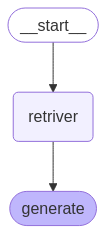

In [55]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
response=graph.invoke({"question":"What is langgraph?"})
print(response["answer"])

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Use the following pieces of context to answer the question at the end.
If you don't know th answer , just say that you don't know, don't try to make up the answer.
Always say "Thank for asking !" at the end of the answer
Assistant: LangGraph is a library designed to help build stateful multi-agent applications using language models. It provides tools for creating workflows and state machines to coordinate multiple AI agents or language model interactions. LangGraph is built on top of LangChain, leveraging its components while adding graph-based coordination capabilities. It's particularly useful for developing more complex, stateful AI applications that go beyond simple query-response interactions.
Goodbye!

Congratulations! You've built your first chatbot using LangGraph. This bot can engage in basic conversation by taking user input and generating responses using an LLM. You can inspect a LangSmith Trace for the call above at the provided link.

However, you may have noticed that the